# Machine Learning Project - Lucie CALEM - pour le 22 juin
### Dataset : student-grade-prediction (https://www.kaggle.com/dipam7/student-grade-prediction)
### Sujet : La Prédiction de la note final
### Problématique : Comment prédire la note final d'un eleve par rapport à ses notes et d'autre facteurs ?
 **Il serait intéressant de pouvoir prédire en fonction de paramètres d'entrées : des caractéristiques démographiques, sociales et scolaires, et ses anciennes note, la note qu'il pourrait avoir au dernier controle.**


Import des librairies et lecture du dataset:

In [ ]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk 

df = pd.read_csv('../content/student-mat.csv')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.head()

school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]

In [ ]:
df.shape

(395, 33)

In [ ]:
df.describe()

age        Medu        Fedu  ...          G1          G2          G3
count  395.000000  395.000000  395.000000  ...  395.000000  395.000000  395.000000
mean    16.696203    2.749367    2.521519  ...   10.908861   10.713924   10.415190
std      1.276043    1.094735    1.088201  ...    3.319195    3.761505    4.581443
min     15.000000    0.000000    0.000000  ...    3.000000    0.000000    0.000000
25%     16.000000    2.000000    2.000000  ...    8.000000    9.000000    8.000000
50%     17.000000    3.000000    2.000000  ...   11.000000   11.000000   11.000000
75%     18.000000    4.000000    3.000000  ...   13.000000   13.000000   14.000000
max     22.000000    4.000000    4.000000  ...   19.000000   19.000000   20.000000

[8 rows x 16 columns]

##Présentation des données
On constate qu'il y a 395 lignes pour 33 colonnes. Cela veut dire que notre échantillon est sur 395 personnes identifiées par les variables que représentent les colonnes. Il n'y a pas de donnée null.

Il faut savoir que ses données représente des élèves de lycée, de deux écoles portugaises. Identifiter par la colonne 'school' par  'GP' pour l'école Gabriel Pereira ou 'MS' pour l'école Mousinho da Silveira.

Les attributs des données comprennent les notes des élèves (G1-G2-G3) pour les matières Maths et Portugais et les caractéristiques démographiques, sociales et scolaires sur les conditions de vie des élèves.
Ces données ont été recueillies à l'aide de rapports scolaires et de questionnaires.

- school : école de l'élève (binaire: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira) 
- sex : sexe de l'élève (binaire: 'F' - femme ou 'M' - homme) 
- age : âge de l'élève (numérique: à partir de 15 à 22) 
- address : type du lieu de vie (domicile) de l'élève (binaire: 'U' - urbain ou 'R' - rural) 
- famsize : taille de la famille (binaire: 'LE3' - inférieur ou égal à 3 ou 'GT3' - supérieur à 3) 
- Pstatus : statut de cohabitation des parents (binaire: 'T' - vivre ensemble ou 'A' - à part) 
- Medu : éducation de la mère (numérique: 0 - aucun, 1 - enseignement primaire, 2 - 6e à 3e, 3 - lycée /enseignement secondaire ou 4 - enseignement supérieur) 
- Fedu : éducation du père (numérique: 0 - aucun, 1 - enseignement primaire, 2 - 6e à 3e, 3 - lycée /enseignement secondaire ou 4 - enseignement supérieur)  
- Mjob : emploi de la mère (nominal: 'enseignant', 'santé' ,'services' civils (par exemple, administration ou police), 'à domicile' ou 'autre')
- Fjob - emploi du père (nominal: 'enseignant', 'santé' ,'services' civils (par exemple, administration ou police), 'à domicile' ou 'autre')
- reason : raison de choisir cette école (nominale: proche de 'domicile', 'réputation' de l'école, préférence des 'cours' ou 'autre') 
- guardian : tuteur de l'élève (nominal: 'mère ',' père 'ou' autre ') 
- traveltime : temps de trajet domicile-école (numérique: 1 - < 15 min, 2 - 15 à 30 min, 3 - 30 min à 1 heure ou 4 - > 1 heure) 
- studytime : temps d'étude hebdomadaire (par semaine) (numérique: 1 - < 2 heures, 2 - 2 à 5 heures, 3 - 5 à 10 heures, or 4 - > 10 heures)) -
- failures : nombre de redoublement (numérique: n si 1 <= n < 3 redoublemment, sinon 0 pas de redoublement) 
- schoolsup : soutien éducatif supplémentaire (binaire: oui ou non) 
- famsup : soutien éducatif familial (binaire: oui ou non)  
- paid : cours payants supplémentaires dans la matière du cours (mathématiques ou portugais) (binaire : oui ou non) 
- activities : activités parascolaires (binaire: oui ou non) 
- nursery : a fréquenté l'école maternelle (binaire: oui ou non) 
- higher : veut suivre des études supérieures (binaire: oui ou non) 
- internet : accès Internet à domicile (binaire: oui ou non) 
- romantic : a une relation amoureuse (binaire: oui ou non) 
- absences : nombre d' absences à l'écoles (numérique: de 0 à 93)

Toute ses valeurs sont évalué sur une échelle de 1 à 5 pour : 
 1 - très faible/mauvais.e à 5 - très élevé/excellente/très bon

- famrel : qualité des relations familiales 
- freetime : temps libre après l'école 
- goout : sortir entre amis 
- Dalc : consommation d'alcool au travail 
- Walc : consommation d'alcool le week-end 
- health : état de santé actuel 

#Les notes (numérique: de 0 à 20)
- G1 : note de la première évaluation 
- G2 : note de la deuxième évaluation 
- G3 : note finale 



Il y a plusieurs facteurs qui rentre en compte pour déterminer la note d'un élève et c'est ce que nous allons voir.

Mais avant cela regardons les données absurdes que nous avons dans le data frame


Text(0.5, 1.0, 'Diagramme à moustache sur tout le dataset')

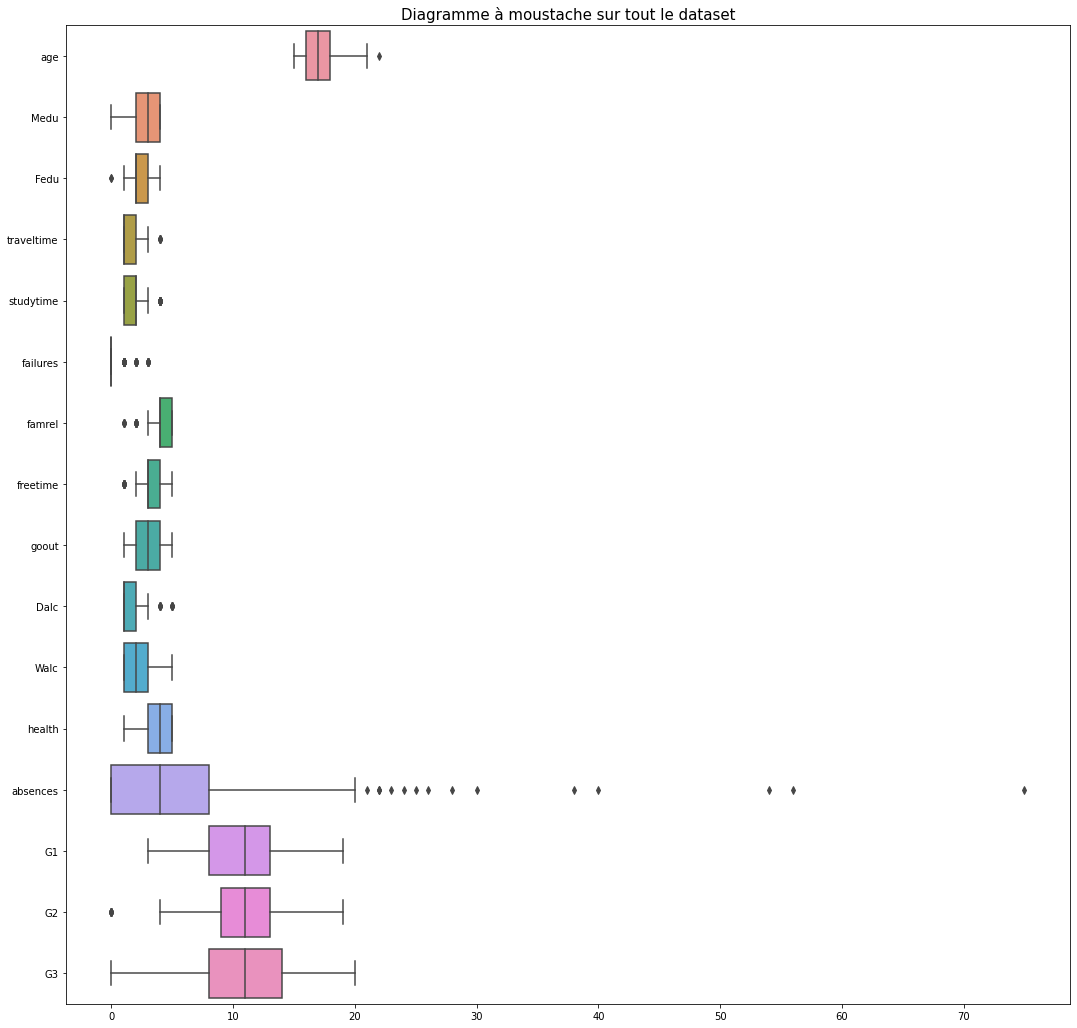

In [ ]:
plt.figure(figsize=(18,18)) # taille de la figure -> lisibilité de la figure
sns.boxplot(data=df, orient='h') #boite à moustache sur le dataframe mais à l'horizontal pour une meilleure visibilité
plt.title('Diagramme à moustache sur tout le dataset', size=15) #titre & taille

# Explication des données : 
Grâce à cette figure qui représente des boites à moustache sur les données non binaire du dataset on constate que quels paramétres ont des données abérantes comme : l'age (mais cela est surement lié au redoublement de classe)- le métier du père - le temps de trajet -le temps d'étude - les redoublements (ils sont en majorité à 0 donc il n'y a pas beaucoup de redoublement) - le temps libre - la consommation d'alcool pendant la semaine de travail - les absences (certains on beaucoup d'absence mais ce sont des personnes à garder car il faut du bruit pour que notre modèle fonctionne) et un 0 pour la note de la 2eme évaluation (G2) qui est a concerver aussi.

Regardont la répartition des 3 notes

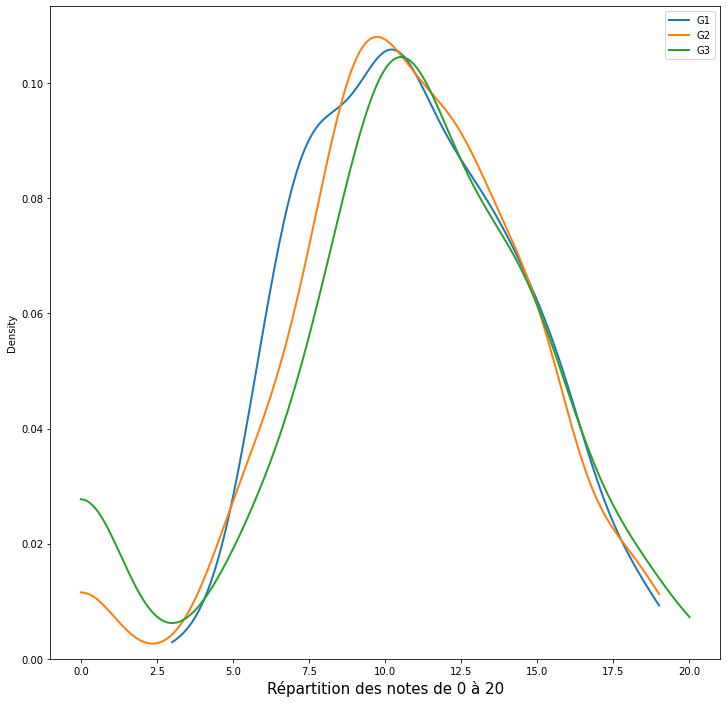

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.kdeplot(df['G1'],  linewidth=2, label='G1', cut=0) #cut=0 sert à ce que la figure commence à 0 
sns.kdeplot(df['G2'],  linewidth=2, label='G2', cut=0)
sns.kdeplot(df['G3'],  linewidth=2, label='G3', cut=0)

plt.xlabel('Répartition des notes de 0 à 20', fontsize = 15)
plt.legend() #affichage de la légende
plt.show()

In [ ]:
dfnote = ['G1','G2','G3'];
df[dfnote].corr()

G1        G2        G3
G1  1.000000  0.852118  0.801468
G2  0.852118  1.000000  0.904868
G3  0.801468  0.904868  1.000000

On constate que les notes sont réparties de manières homogènes sur ce diagramme. Ce qui nous permet de conclure que les notes G1-G2 sont en corrélation avec la note G3 quand on regarde la corrélation entre G1 et G3 qui est de 0.80 et entre G2 et G3 à 0.90. Plus nous sommes proches de 1 plus la corrélation entre les deux éléments est existante.

Regardons pour savoir si le lieu de résidence a un impacte sur les notes des eleves

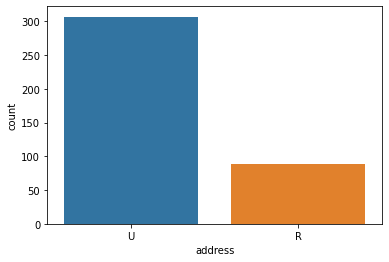

In [ ]:
sns.countplot(data=df,x='address')

On constate qu'il y a plus de personne qui vit dans un milieu urban que dans un milieu rural. On se demande si cela à un impact sur les notes

In [ ]:
dfaddress = ['G1','G2','G3','address'];
df[dfaddress].corr()

G1        G2        G3
G1  1.000000  0.852118  0.801468
G2  0.852118  1.000000  0.904868
G3  0.801468  0.904868  1.000000

On peut constater qu'en effet le milieu de vie a une corrélation par rapport aux notes obtenue par les élèves

Regarde-on si les absences des élèves a un impact sur les notes et donc le décrochage scolaire 

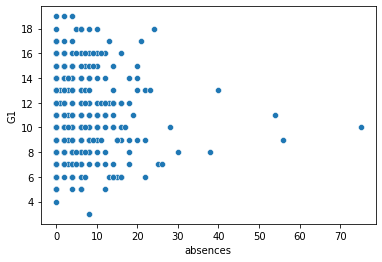

In [ ]:
sns.scatterplot(data=df, x="absences", y="G1")

On constate que pour la premiere note, il n'y a pas vraiment de corrélation, un élèves n'ayant pas d'abscence à eu 4 alors qu'un eleve avant environ 25 abscence à eu un 18/20 ce qui correspond meme à une excellente note.

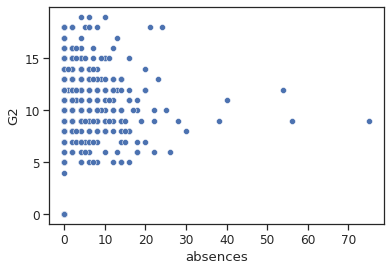

In [ ]:
sns.scatterplot(data=df, x="absences", y="G2")

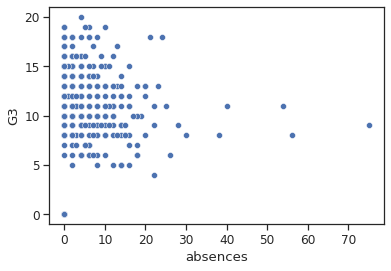

In [ ]:
sns.scatterplot(data=df, x="absences", y="G3")

On constate que pour G2 et G3 la répartition est environ la meme.
EN effet les données exterme d'absence montre toujours que l'élève à un peu en dessous de la moyenne (10) ce qui n'est ni une mauvaise note ni une bonne note.
On en conclut donc qu'il n'y a pas vraiment de corrélation entre les absences et les notes des élèves.

Nettoyager les données pour faire du maching learning 

Nous allons donc sélectionner quelque donnée qui pourrait nous aider à derterminier la derniere note

In [ ]:
selection = ['sex','Pstatus','Mjob','Fjob','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','health','absences','G1','G2','G3'];
df[selection].head()

sex Pstatus     Mjob      Fjob  studytime  ...  health absences  G1  G2  G3
0   F       A  at_home   teacher          2  ...       3        6   5   6   6
1   F       T  at_home     other          2  ...       3        4   5   5   6
2   F       T  at_home     other          2  ...       3       10   7   8  10
3   F       T   health  services          3  ...       5        2  15  14  15
4   F       T    other     other          2  ...       5        4   6  10  10

[5 rows x 18 columns]

On convertie les données non numérique en valeur numérique

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[selection] = df[selection].apply(lambda col: le.fit_transform(col))
df[selection].head()

sex  Pstatus  Mjob  Fjob  studytime  ...  health  absences  G1  G2  G3
0    0        0     0     4          1  ...       2         6   2   3   3
1    0        1     0     2          1  ...       2         4   2   2   3
2    0        1     0     2          1  ...       2        10   4   5   7
3    0        1     1     3          2  ...       4         2  12  11  12
4    0        1     2     2          1  ...       4         4   3   7   7

[5 rows x 18 columns]

# Les corrélations 

Nos données sont maintenant transformé et prête à etre utilisé pour ML.
Mais comme il y a encore beaucoup de données nous allons regarder lesquels ont le plus de corrélation avec les notes afin d'afficher notre programme de ML

Text(0.5, 1.0, 'Correlation Matrix (Spearman)')

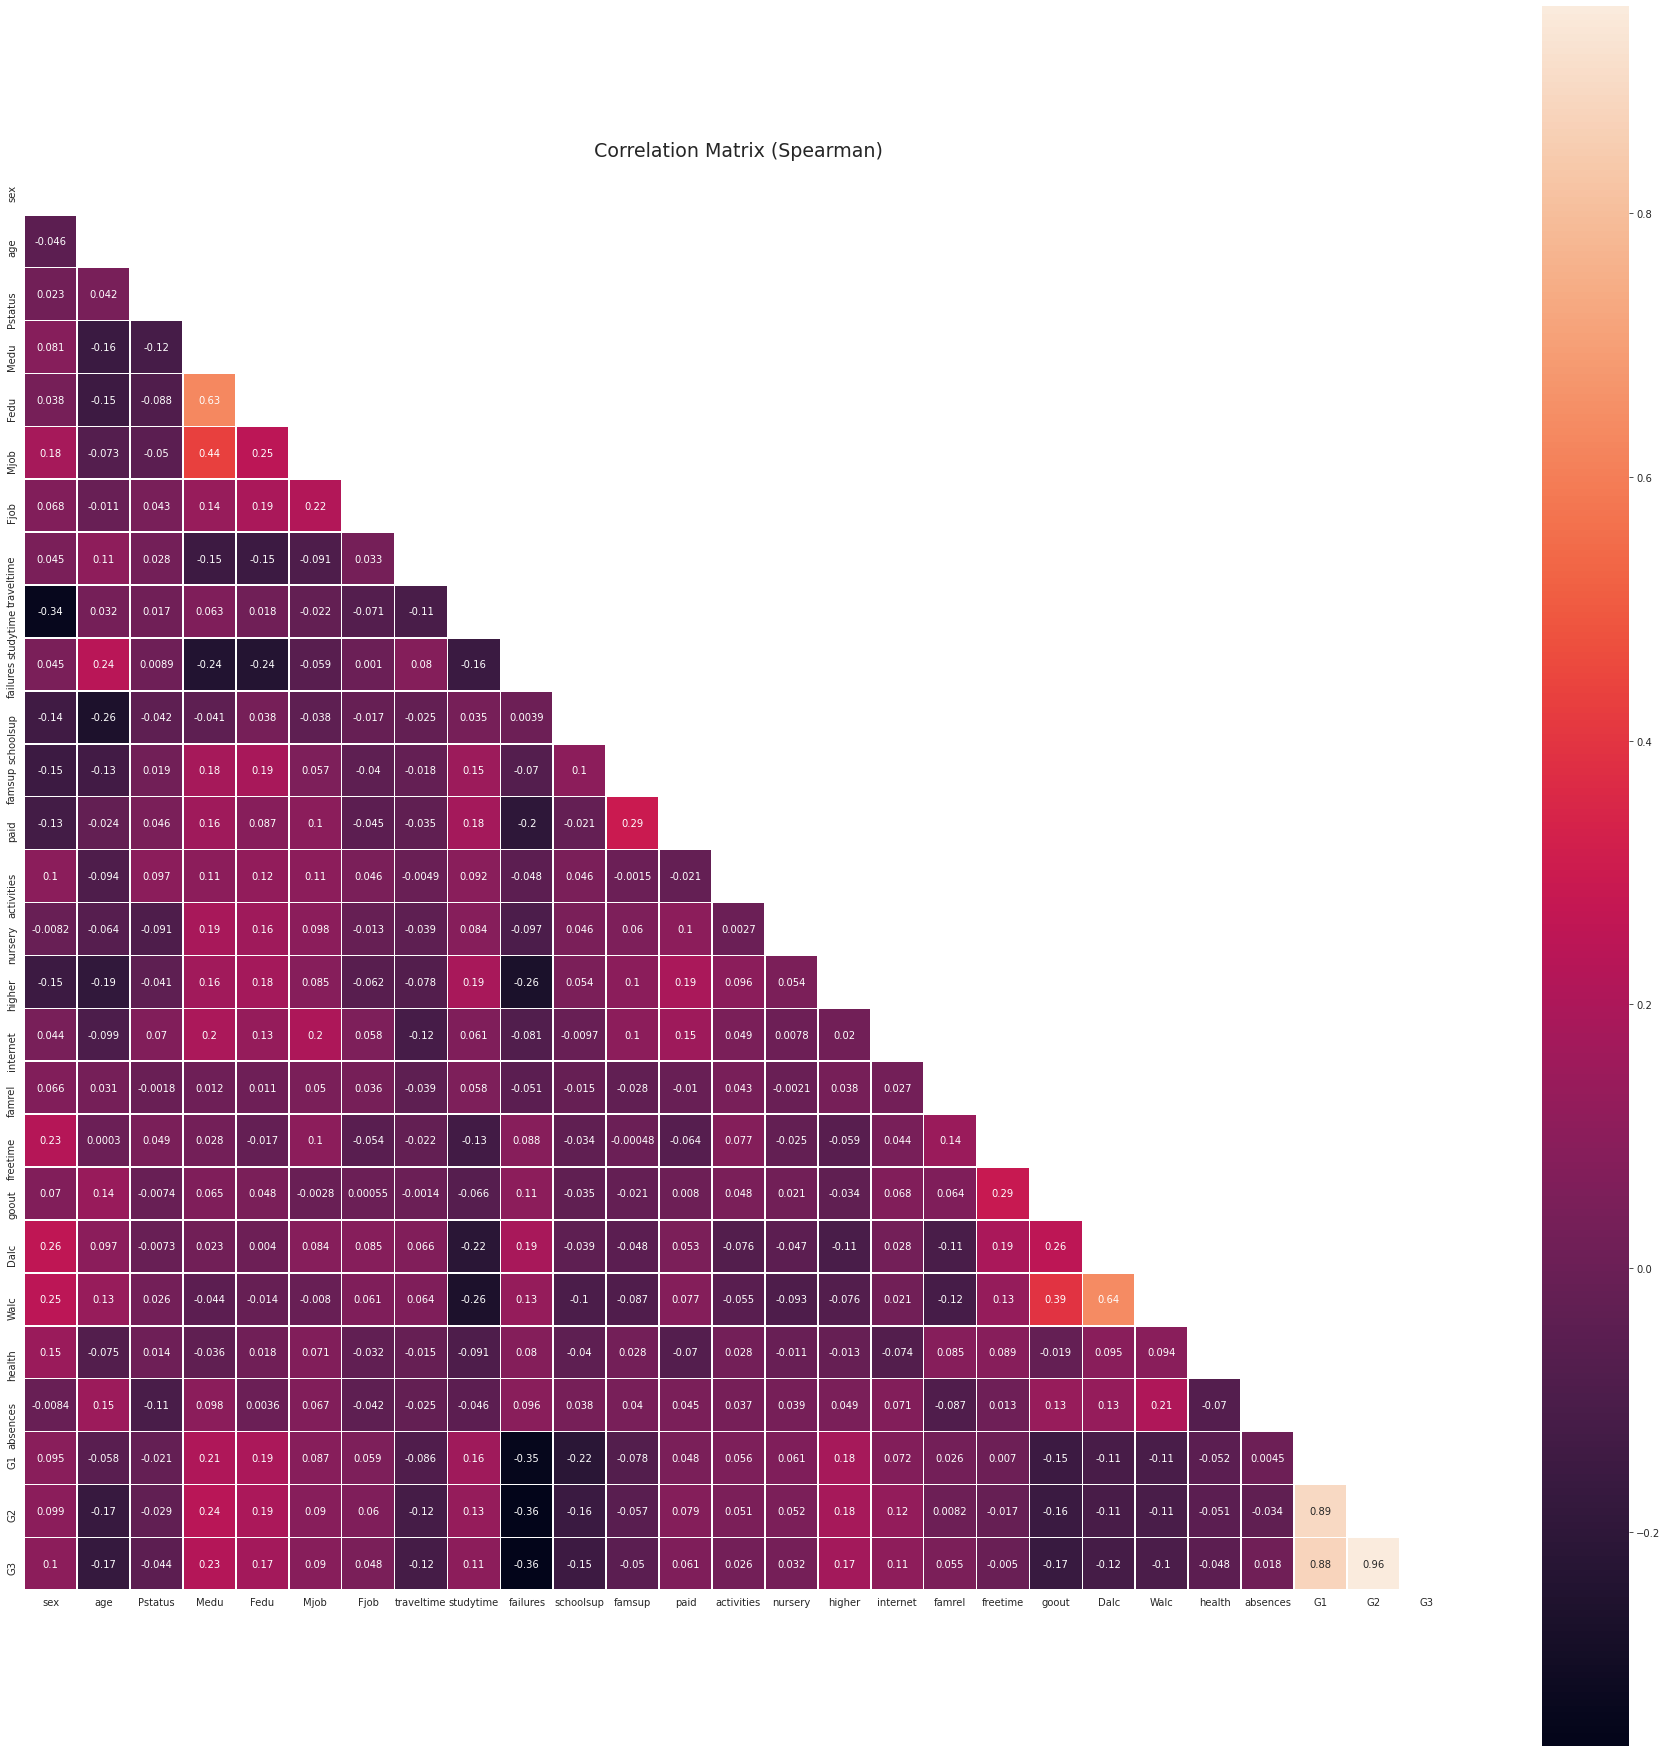

In [ ]:
corr = df.corr(method='spearman') 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(32, 32))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.6,annot=True)
plt.title('Correlation', size=19)

Ici les lignes utiles sojnt les 3 derniers car elles mettent en rapport les notes avec toute les données du tableau. 

Regardonc les corrélations en rapport avec la dernière évaluation G3

In [ ]:
most_correlated = df.corr().abs()['G3'].sort_values(ascending=False)
most_correlated

G3            1.000000
G2            0.939188
G1            0.851008
failures      0.358565
Medu          0.221824
higher        0.175033
age           0.164677
Fedu          0.160467
goout         0.146652
traveltime    0.118814
schoolsup     0.117905
sex           0.107966
studytime     0.107569
internet      0.105222
Mjob          0.103090
paid          0.081555
Walc          0.080917
Dalc          0.074477
health        0.068146
Pstatus       0.054756
famrel        0.050990
Fjob          0.049534
nursery       0.049058
famsup        0.046313
activities    0.024963
freetime      0.005473
absences      0.000204
Name: G3, dtype: float64

Les données sont trier dans l'ordre décroissant par rapport au score de corrélation.

* G2            0.939188 -> forte corrélation avec G3  
* G1            0.851008-> forte corrélation avec G3  
* failures      0.358565-> faible corrélation avec G3  
* Medu          0.221824-> faible corrélation avec G3  
* higher        0.175033-> faible corrélation avec G3  
* age           0.164677-> faible corrélation avec G3  
* Fedu          0.160467-> faible corrélation avec G3  
* goout         0.146652-> faible corrélation avec G3  
* traveltime    0.118814-> faible corrélation avec G3  
* schoolsup     0.117905-> faible corrélation avec G3  
* sex           0.107966-> faible corrélation avec G3  
* studytime     0.107569-> faible corrélation avec G3  
* internet      0.105222-> faible corrélation avec G3  
* Mjob          0.103090-> faible corrélation avec G3  
* paid          0.081555-> très faible corrélation avec G3  
* Walc          0.080917-> très faible corrélation avec G3  
* Dalc          0.074477-> très faible corrélation avec G3  
* health        0.068146-> très faible corrélation avec G3  
* Pstatus       0.054756-> très faible corrélation avec G3  
* famrel        0.050990-> très faible corrélation avec G3  
* Fjob          0.049534-> très faible corrélation avec G3  
* nursery       0.049058-> très faible corrélation avec G3  
* famsup        0.046313-> très faible corrélation avec G3  
* activities    0.024963-> très faible corrélation avec G3  
* freetime      0.005473-> très très faible corrélation avec G3  
* absences      0.000204-> très très faible corrélation avec G3  

# Découpage entre TRAIN et TEST 
Comme expliquer dans la documentation faite, il faut que l'algorthme puisse s'entrainer avant de tester pour savoir comment faire. C'est pour cela qu'il est important de séparer les données en deux groupes (un entrainement avec la solution et un de test sans la réponse) sinon nous ne pourrons pas faire de prédiction si la réponse est connue.

In [ ]:
from sklearn.model_selection import train_test_split

df2 = df[['G1', 'G2', 'G3', 'failures']] #on créer un tableau bis avec les notes et le nombre de redoublement de l'élève

X = df2.drop('G3', axis=1) # on retire G3 du tableau bis
y = df2['G3'] # on met la target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [ ]:
X_train.shape, X_test.shape 

((316, 3), (79, 3))

La taille de l'échantillion d'entrainement est de 316
La taille de l'échantillion de test est de 79

# Fonction Random Forest Regressor de ML

Entrainement 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#R2
rf.score(X_train,y_train)

0.9285710331320968

In [ ]:
X_train

G1  G2  failures
64    7   7         0
144   2   0         3
131   5   0         0
139  13  13         0
295  11   9         0
..   ..  ..       ...
241   7   8         0
253   5   6         0
390   6   6         2
155   8   5         0
331   9  11         0

[316 rows x 3 columns]

Validation du modèles

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.8303053336987233


La variance R2 est de 0.83030 ce qui indique la précision de notre algo est plutot juste 

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

2.246408258368672


Le score moyen des erreurs au carrée est de 2.2464. Cela veut dire que la moyenne des erreurs aux carrée des résulatst que nous founir notre algorithme est d'environ 2 . la personne a en réalité 2 points en plus ou en moins par rapport à ce que l'on avait prédit 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


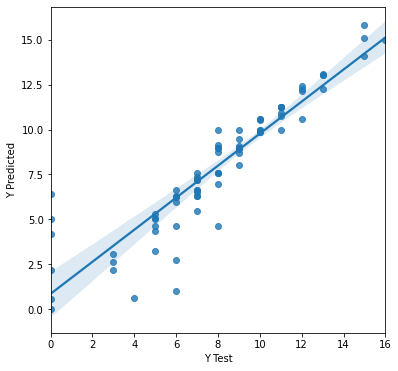

In [ ]:
plt.figure(figsize=(6,6))

sns.regplot(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

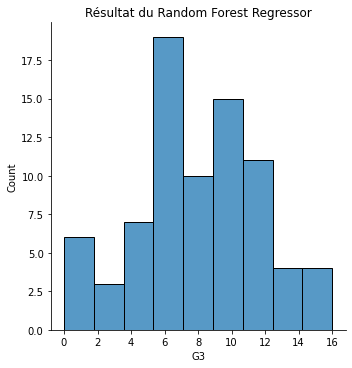

In [ ]:
sns.displot(y_test)
plt.title("Résultat du Random Forest Regressor")
plt.show()

Voici à quoi ressemble les résulats donnée par notre algorithme avec une moyenne d'erreur au carrée de 2.
Regardons la courbe que l'on peut tracé par rapport à la courbe G3.

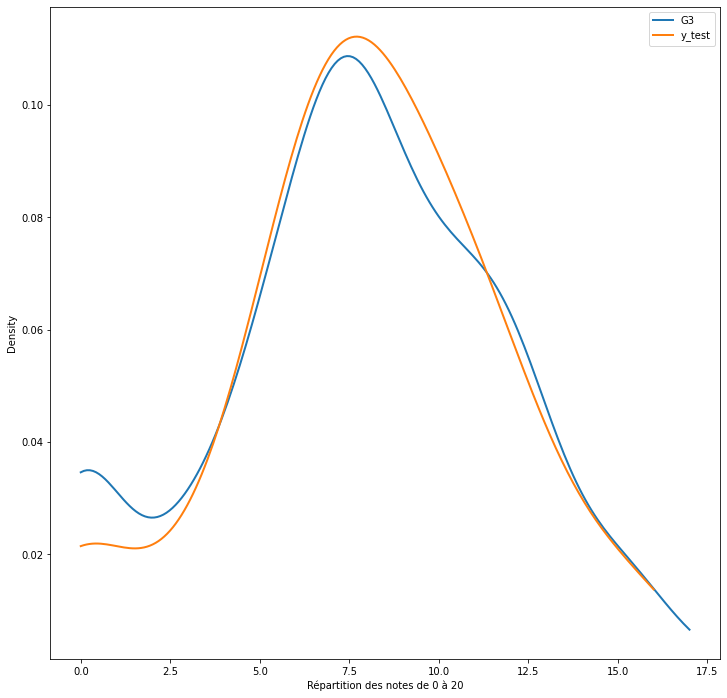

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.kdeplot(df['G3'],  linewidth=2, label='G3', cut=0) #cut=0 sert à ce que la figure commence à 0 
sns.kdeplot(y_test,  linewidth=2, label='y_test', cut=0)
plt.xlabel('Répartition des notes de 0 à 20')
plt.legend() #affichage de la légende
plt.show()

# Conclusion

Les deux modèles se suivent, il y a de l'écart au niveau des premières valeurs et au niveau de la descente. La courbe ne suit pas exactement la courbe G3 mais elle n'est pas non plus trop éloigner, notre modèles est donc **over fitting** car il colle beaucoup trop aux données d'entrainement, mais il n'est pas under fitting. 
Cette algorithme avec le nombre de redoublement fait par l'élève et ses anciennes notes, nous indique être trop dans l'over fitting car il y a une grande corrélation entre les notes obtenues et les redoublements mais nous pourriez essayer avec d'autres données comme l'age ou le temps de transport qui ont une faible corrélation pour voir les résultats que cela donne. Probablement que l'utilisation du même algorithme avec des valeurs comme celle-ci rendront notre algorithm moins over fitting mais il y a aussi de forte change pour que le modèle soit under fetting car les parametres d'entrées n'ont pas vraiment de liens entre eux.